## 14.4 Homework
1. Import the visual package in python to make an animation on the screen of the position of the particle in Brownian motion.
2. Rewrite the radioactive decay, to generate 2000 random numbers following the non-uniformed distribution (This is already a solved problem in the class. However, you are suggested to repeat it by yourself).

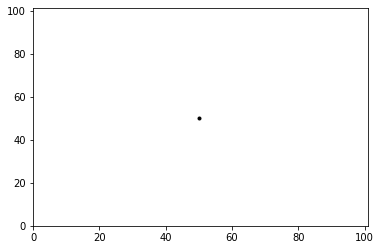

In [1]:
# Brownian Motion
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation as animation

fig, ax = plt.subplots()

L1 = 101
L2 = 101
N = 1000

xdata = []
ydata = []
direction = np.array([[0,1],[0,-1],[1,0],[-1,0]]) #up, down, right, left
line, = plt.plot([],[],'k.')

def init():
    #initialization
    ax.set_xlim(0,L1)
    ax.set_ylim(0,L2)
    xdata.append(int(L1/2))
    ydata.append(int(L2/2))
    line.set_data(xdata, ydata)
    return line,


def brown(position):
    
    x = -1
    y = -1

    #np.random.seed(2) 

    # random walk
    while min(x,y) < 0 or x > L1 or y > L2:
        walk = np.random.randint(len(direction))
        x = xdata[position - 1] + direction[walk][0]
        y = ydata[position - 1] + direction[walk][1]
    
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
    
    return line,
    
ani = animation(fig, brown, frames = np.arange(1,N), init_func = init, blit = True)        
plt.show()
        
        
# plot the trajectory
# ax = plt.axes()
# ax.set_facecolor('silver')
# plt.xlim(0,L1)
# plt.ylim(0,L2)
# plt.title('Brownian motion')
# plt.scatter(position[:,0], position[:,1], c=range(N), s=60, alpha=0.8)
# plt.text(position[0,0], position[0,1], 'start', fontsize=24, color='w')
# plt.text(position[-1,0], position[-1,1], 'end', fontsize=24)

# cbar = plt.colorbar()
# cbar.set_label('Itertion number')
# plt.show()

Radioactive Decay

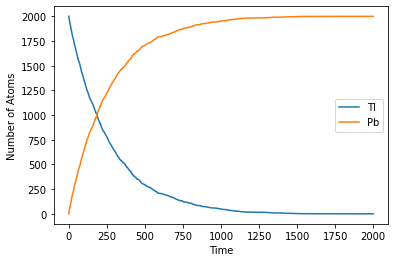

In [4]:
tmax = 2000
N_Tl = 2000
N_Pb = 0
tau = 3.053*60 #seconds
dt = 1 #seconds
p = 1 - 2**(-dt/tau)

t_points = np.arange(0.0, tmax, dt)
Tl = []
Pb = []

for t in range(tmax):
    Tl.append(N_Tl)
    Pb.append(N_Pb)
    
    decay = 0 
    for i in range(N_Tl):
        if np.random.random() < p:
            decay += 1
    N_Tl -= decay
    N_Pb += decay
    
plt.plot(t_points, Tl, label = 'Tl')
plt.plot(t_points, Pb, label = 'Pb')
plt.xlabel("Time")
plt.ylabel("Number of Atoms")
plt.legend()
plt.show()